<a href="https://colab.research.google.com/github/mafiTec/Deep-Neural-Networks/blob/main/CNN_Project_(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

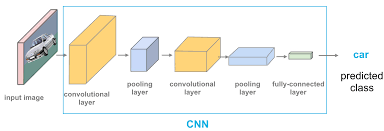

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Deep Neural Networks/cn.png')

# Convolutional Neural Network

# Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Specifying the TensorFlow version

In [ ]:
tf.__version__

'2.7.0'

# Testing for GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

# Mounting Google Drive locally

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Deep Neural Networks')

# Data Preprocessing

Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Neural Networks/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 4000 images belonging to 2 classes.


# Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Neural Networks/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


# Building the CNN

# Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

# Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

# Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Model Summary

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

#Training the CNN

#Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
125/125 [==============================] - 2001s 16s/step - loss: 0.6866 - accuracy: 0.5570 - val_loss: 0.6803 - val_accuracy: 0.5300
Epoch 2/25
125/125 [==============================] - 31s 251ms/step - loss: 0.6419 - accuracy: 0.6240 - val_loss: 0.6199 - val_accuracy: 0.6520
Epoch 3/25
125/125 [==============================] - 31s 249ms/step - loss: 0.5883 - accuracy: 0.6867 - val_loss: 0.5668 - val_accuracy: 0.7110
Epoch 4/25
125/125 [==============================] - 31s 246ms/step - loss: 0.5454 - accuracy: 0.7197 - val_loss: 0.5960 - val_accuracy: 0.6770
Epoch 5/25
125/125 [==============================] - 31s 248ms/step - loss: 0.5272 - accuracy: 0.7310 - val_loss: 0.5157 - val_accuracy: 0.7470
Epoch 6/25
125/125 [==============================] - 31s 248ms/step - loss: 0.5167 - accuracy: 0.7445 - val_loss: 0.4989 - val_accuracy: 0.7610
Epoch 7/25
125/125 [==============================] - 32s 252ms/step - loss: 0.5052 - accuracy: 0.7508 - val_loss: 0.4988 - val_ac

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Deep Neural Networks/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# Making a single prediction

In [ ]:
print(prediction)

dog
